# Analyze the data traffic, focusing on the number of packets per second (PPS) and throughput.


Use lib scapy to analyze the packet

In [5]:
from scapy.all import rdpcap, UDP, IP
import pandas as pd
import matplotlib.pyplot as plt

Filter the packet by target port in UDP hander

In [6]:
def load_and_filter_packets(file_path, target_port):
    # Read the pcap file
    packets = rdpcap(file_path)
    
    # Initialize data storage
    data = {
        "timestamp": [],
        "source_ip": [],
        "destination_ip": [],
        "udp_length": []
    }

    # Filter UDP packets and the specified port
    for packet in packets:
        if UDP in packet and packet[UDP].dport == target_port:
            data["timestamp"].append(packet.time)
            data["source_ip"].append(packet[IP].src)
            data["destination_ip"].append(packet[IP].dst)
            data["udp_length"].append(packet[UDP].len)
    
    return pd.DataFrame(data)

Select 1 Min Data and plot the PPS (Packets Per Second) curve for haptic and video data and mark the average values.


In [66]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_data(df1, df2):
    # 创建数据帧的副本，以免修改原有数据
    df1_copy = df1.copy()
    df2_copy = df2.copy()

    # 将时间戳转换为浮点数，然后转换为日期时间对象
    df1_copy['timestamp'] = pd.to_datetime(df1_copy['timestamp'].astype(float), unit='s')
    df2_copy['timestamp'] = pd.to_datetime(df2_copy['timestamp'].astype(float), unit='s')
    
    # 找到两个数据帧中的最小时间戳
    min_timestamp = min(df1_copy['timestamp'].min(), df2_copy['timestamp'].min())

    # 计算相对于最小时间戳的时间差（秒）
    df1_copy['time_delta'] = (df1_copy['timestamp'] - min_timestamp).dt.total_seconds()
    df2_copy['time_delta'] = (df2_copy['timestamp'] - min_timestamp).dt.total_seconds()

    # 计算每秒的分组数
    df1_copy['second_bins'] = df1_copy['time_delta'].astype(int)
    df2_copy['second_bins'] = df2_copy['time_delta'].astype(int)

    packet_counts_per_second_df1 = df1_copy.groupby('second_bins').size()
    packet_counts_per_second_df2 = df2_copy.groupby('second_bins').size()

    # 获取两个数据帧覆盖的完整时间范围
    full_range = pd.RangeIndex(start=min(packet_counts_per_second_df1.index.min(), packet_counts_per_second_df2.index.min()), 
                               stop=max(packet_counts_per_second_df1.index.max(), packet_counts_per_second_df2.index.max()) + 1)

    # 重新索引，填充缺失的秒数为零
    packet_counts_per_second_df1 = packet_counts_per_second_df1.reindex(full_range, fill_value=0)
    packet_counts_per_second_df2 = packet_counts_per_second_df2.reindex(full_range, fill_value=0)

    # 创建用于可视化的组合数据帧
    combined_df = pd.DataFrame({
        'Haptic Stream': packet_counts_per_second_df1,
        'Video Stream': packet_counts_per_second_df2
    })

    # 截取第100秒到第160秒的数据
    combined_df = combined_df.loc[100:160]

    # 计算每个数据帧的平均值
    mean_df1 = combined_df['Haptic Stream'].mean()
    mean_df2 = combined_df['Video Stream'].mean()

    # 数据可视化 - 每秒的包数
    ax = combined_df.plot(figsize=(8, 8), color=['#f89588', '#63b2ee'])
    ax.set_xlabel('Time since first packet (seconds)', fontsize = 18)
    ax.set_ylabel('Number of Packets', fontsize = 18)
    
    # 在图中标出均值，用虚横线表示
    ax.axhline(mean_df1, color='#f89588', linestyle='--', linewidth=1, label='Mean PPS of Haptic')
    ax.axhline(mean_df2, color='#63b2ee', linestyle='--', linewidth=1, label='Mean PPS of Video')

    # 添加图例
    ax.legend(fontsize = 14)
    
    # plt.grid(True)
    plt.xlim(100, 160)
    plt.ylim(0, 1100)

    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)

    plt.savefig(r"C:\Users\Administrator\Desktop\Diplom_arbeit\da_multimedia_data\figures\methods\PPS_traffic.png")
    plt.savefig(r"C:\Users\Administrator\Desktop\Diplom_arbeit\da_multimedia_data\figures\methods\PPS_traffic.eps")


    plt.show()


In [8]:
# Usage example
file_path = r'C:\Users\Administrator\Desktop\Diplom_arbeit\da_multimedia_data\090501\camera_client_0905.pcapng'  # path
df1_packets = load_and_filter_packets(file_path,54343)
file_path = r'C:\Users\Administrator\Desktop\Diplom_arbeit\da_multimedia_data\090501\haptic_client_0905.pcapng'  # path
df2_packets = load_and_filter_packets(file_path,888)

#visualize_data(df2_packets,df1_packets)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


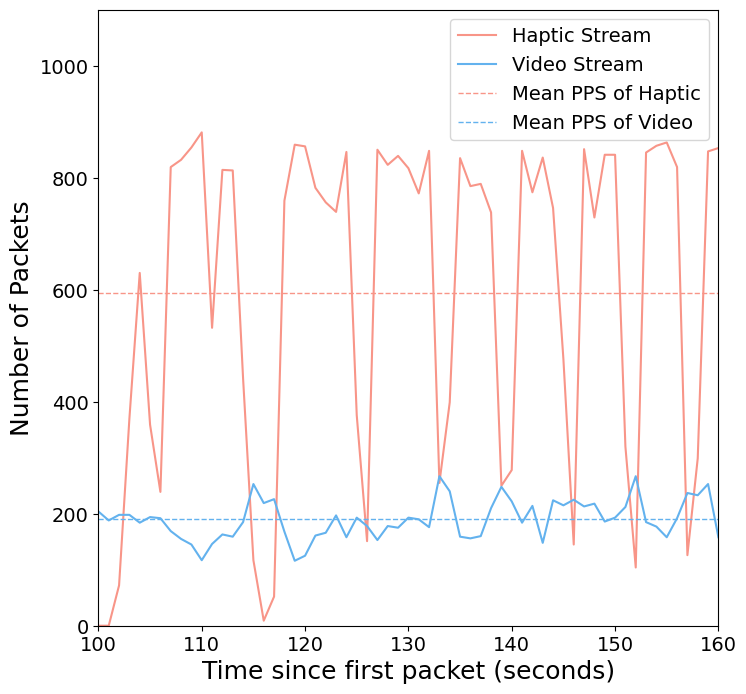

In [67]:
visualize_data(df2_packets,df1_packets)

<Figure size 1200x600 with 0 Axes>

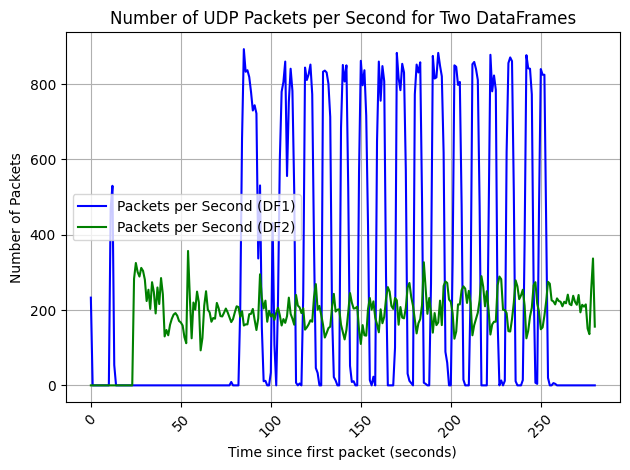

In [4]:
# Usage example
file_path = r'C:\Users\Administrator\Desktop\Diplom_arbeit\da_multimedia_data\082801\client_camera.pcapng'  # path
df1_packets = load_and_filter_packets(file_path,46579)
file_path = r'C:\Users\Administrator\Desktop\Diplom_arbeit\da_multimedia_data\082801\haptic_client.pcapng'  # path
df2_packets = load_and_filter_packets(file_path,888)

visualize_data(df2_packets,df1_packets)